<a href="https://colab.research.google.com/github/SmallFace21/Convolutional-Neural-Network/blob/main/Nathan_LaBar_Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nathan LaBar

Assignment 12

CAP4613

LINK:https://colab.research.google.com/drive/1Itq3SH20NviY4jzEHhv3rMTGJsk5cR16?usp=sharing

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from random import randint

def img_plt (images, labels):
  plt.figure()
  for i in range(1, 11):
    plt.subplot(2,5,i)
    plt.imshow(images[i-1,:,:])
    plt.title('Label: ' + str(labels[i-1]))
  plt.show()

def feat_plot(features, labels, classes):
  for class_i in classes:
    plt.plot(features[labels[:]==class_i, 0], features[labels[:]==class_i, 1], 'o')
  plt.xlabel("x: feature 1")
  plt.ylabel("y: feature 2")
  plt.legend("Class" + str(classes[class_i]))
  plt.show()

def acc_fun(labels_actual, labels_pred):
  acc = np.sum(labels_actual==labels_pred)/len(labels_actual)*100
  return acc

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes = np.arange(10)

#select from training data a validation set randomly
num_train_img = x_train.shape[0]
train_ind = np.arange(0, num_train_img)
train_ind_s = np.random.permutation(train_ind)
x_train = x_train[train_ind_s,:,:,:]
y_train = y_train[train_ind_s]

#validation set
x_val = x_train[0:int(0.2*num_train_img),:, :,:]
y_val = y_train[0:int(0.2*num_train_img):]

x_train = x_train[int(0.2*num_train_img):,:,:]
y_train = y_train[int(0.2*num_train_img):]

print ("Samples of training images ")
img_plt(x_train[0:10,:,:,:], y_train[0:10])

#scale images
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_val /= 255
x_test /= 255

#binary class matrice
y_train_c = to_categorical(y_train, len(classes))
y_val_c = to_categorical(y_val, len(classes))
y_test_c = to_categorical(y_test, len(classes))



In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization
from keras.utils import to_categorical
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
    epochs = np.arange(loss_train.shape[0])
    plt.subplot(1,2,1)
    plt.plot(epochs, accuracy_train, epochs, accuracy_val)
    plt.legend(['Training', 'Validation'])
    #plt.axis([-1,2,-1,2])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')

    plt.subplot(1,2,2)
    plt.plot(epochs, loss_train, epochs, loss_val)
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy loss')
    plt.title('Loss')
    plt.legend(["Training" , "Validation"])
    plt.show()

#defining the model
model_a = Sequential()
model_a.add(Conv2D(32, (3, 3),padding = "same", input_shape = (32, 32, 3)))
model_a.add(Activation("relu"))
model_a.add(Conv2D(32, (3, 3), padding = "same",))
model_a.add(Activation("relu"))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Conv2D(64, (3, 3), padding = "same"))
model_a.add(Activation("relu"))
model_a.add(Conv2D(64, (3, 3), padding = "same",))
model_a.add(Activation("relu"))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Flatten())
model_a.add(Dense(512, activation='relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(units = 10, activation='softmax'))
model_a.summary()


Epoch 1/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3065 - loss: 1.8872

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3069 - loss: 1.8860 - val_accuracy: 0.4992 - val_loss: 1.4098
Epoch 2/50
1240/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5002 - loss: 1.3934

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5003 - loss: 1.3930 - val_accuracy: 0.5590 - val_loss: 1.2305
Epoch 3/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5646 - loss: 1.2173

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5646 - loss: 1.2172 - val_accuracy: 0.6067 - val_loss: 1.1054
Epoch 4/50
1239/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6155 - loss: 1.0960

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6155 - loss: 1.0959 - val_accuracy: 0.6266 - val_loss: 1.0573
Epoch 5/50
1240/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6497 - loss: 1.0094

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6497 - loss: 1.0093 - val_accuracy: 0.6688 - val_loss: 0.9572
Epoch 6/50
1247/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6741 - loss: 0.9402

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6741 - loss: 0.9402 - val_accuracy: 0.6775 - val_loss: 0.9210
Epoch 7/50
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6968 - loss: 0.8729

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6968 - loss: 0.8730 - val_accuracy: 0.6878 - val_loss: 0.8872
Epoch 8/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7156 - loss: 0.8223

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7156 - loss: 0.8222 - val_accuracy: 0.6982 - val_loss: 0.8645
Epoch 9/50
1239/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7384 - loss: 0.7605

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7384 - loss: 0.7606 - val_accuracy: 0.7001 - val_loss: 0.8461
Epoch 10/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7522 - loss: 0.7168

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7522 - loss: 0.7168 - val_accuracy: 0.7149 - val_loss: 0.8213
Epoch 11/50
1244/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7662 - loss: 0.6665

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7662 - loss: 0.6665 - val_accuracy: 0.7258 - val_loss: 0.7829
Epoch 12/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7878 - loss: 0.6174 - val_accuracy: 0.7306 - val_loss: 0.7857
Epoch 13/50
1241/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7912 - loss: 0.5931

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7912 - loss: 0.5930 - val_accuracy: 0.7368 - val_loss: 0.7702
Epoch 14/50
1246/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8114 - loss: 0.5448

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8114 - loss: 0.5448 - val_accuracy: 0.7375 - val_loss: 0.7606
Epoch 15/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8232 - loss: 0.5048 - val_accuracy: 0.7405 - val_loss: 0.7709
Epoch 16/50
1249/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8404 - loss: 0.4634

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8404 - loss: 0.4634 - val_accuracy: 0.7471 - val_loss: 0.7563
Epoch 17/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8497 - loss: 0.4279 - val_accuracy: 0.7465 - val_loss: 0.7636
Epoch 18/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8641 - loss: 0.3896 - val_accuracy: 0.7527 - val_loss: 0.7617
Epoch 19/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8769 - loss: 0.3539 - val_accuracy: 0.7434 - val_loss: 0.8074
Epoch 20/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8846 - loss: 0.3332 - val_accuracy: 0.7530 - val_loss: 0.7749
Epoch 21/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8968 - loss: 0.2966 - val_accuracy: 0.7502 - val_loss: 0.8129
Epoch 22/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9053 - loss: 0.2685 - val_accuracy: 0.7540 - val_loss: 0.8334
Epoch 23/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9152 - loss: 0.2472 - va

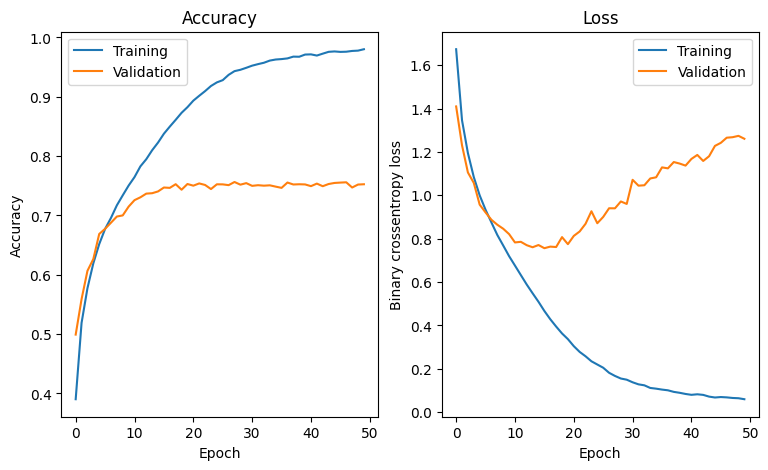

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9116 - loss: 0.3056
Training loss: 0.31108060479164124
Training accuracy: 0.9089249968528748
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7503 - loss: 0.7546
Validation loss: 0.75630784034729


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_a.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

#checkpoint
save_path = '/content/drive/My Drive/model_a.h5'
callbacks_save = ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True, save_freq = 'epoch')

#change to 50 epochs, batch size 32 when finished testing
history = model_a.fit(x_train, y_train_c, batch_size =32,
                     epochs = 50, verbose = 1,
                     validation_data = (x_val, y_val_c),
                     callbacks = [callbacks_save])

plt.figure(figsize = [9, 5])
acc_curve_train = np.array(history.history['accuracy'])
acc_curve_val = np.array(history.history['val_accuracy'])
loss_curve_train = np.array(history.history['loss'])
loss_curve_val = np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)

#load best model saved based on lowest validation loss
model_a = load_model(save_path)

#evaluate model on training samples
score = model_a.evaluate(x_train, y_train_c)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

#evaluate model on validation set
score = model_a.evaluate(x_val, y_val_c)
print('Validation loss:', score[0])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.2849 - loss: 1.9476

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.3193 - loss: 1.8581 - val_accuracy: 0.4541 - val_loss: 1.4898
Epoch 2/50
1250/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.4524 - loss: 1.5129

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.4564 - loss: 1.5014 - val_accuracy: 0.5197 - val_loss: 1.3469
Epoch 3/50
1248/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.4955 - loss: 1.3967

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.4990 - loss: 1.3880 - val_accuracy: 0.5513 - val_loss: 1.2353
Epoch 4/50
1249/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.5222 - loss: 1.3276

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.5279 - loss: 1.3162 - val_accuracy: 0.5755 - val_loss: 1.1894
Epoch 5/50
1250/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5502 - loss: 1.2550

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.5534 - loss: 1.2475 - val_accuracy: 0.5974 - val_loss: 1.1501
Epoch 6/50
1249/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.5751 - loss: 1.2000

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.5778 - loss: 1.1906 - val_accuracy: 0.6157 - val_loss: 1.0768
Epoch 7/50
1249/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5928 - loss: 1.1499

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.5951 - loss: 1.1434 - val_accuracy: 0.6256 - val_loss: 1.0703
Epoch 8/50
1249/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.6104 - loss: 1.1014

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.6122 - loss: 1.0970 - val_accuracy: 0.6436 - val_loss: 1.0118
Epoch 9/50
1249/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.6215 - loss: 1.0609

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.6246 - loss: 1.0581 - val_accuracy: 0.6601 - val_loss: 0.9765
Epoch 10/50
1249/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.6341 - loss: 1.0365

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.6355 - loss: 1.0330 - val_accuracy: 0.6643 - val_loss: 0.9501
Epoch 11/50
1248/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.6518 - loss: 0.9922

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.6497 - loss: 0.9923 - val_accuracy: 0.6816 - val_loss: 0.9127
Epoch 12/50
1250/2500 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.6560 - loss: 0.9812

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.6568 - loss: 0.9781 - val_accuracy: 0.6881 - val_loss: 0.8895
Epoch 13/50
1248/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6692 - loss: 0.9483

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.6695 - loss: 0.9476 - val_accuracy: 0.6907 - val_loss: 0.8759
Epoch 14/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.6739 - loss: 0.9233 - val_accuracy: 0.6747 - val_loss: 0.9300
Epoch 15/50
1249/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.6799 - loss: 0.9122

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.6799 - loss: 0.9114 - val_accuracy: 0.7218 - val_loss: 0.7991
Epoch 16/50
1250/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.6856 - loss: 0.8930

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.6862 - loss: 0.8917 - val_accuracy: 0.7215 - val_loss: 0.7968
Epoch 17/50
1250/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.6938 - loss: 0.8631

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.6934 - loss: 0.8676 - val_accuracy: 0.7279 - val_loss: 0.7761
Epoch 18/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.6965 - loss: 0.8605 - val_accuracy: 0.7164 - val_loss: 0.8098
Epoch 19/50
1249/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.7036 - loss: 0.8406

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.7040 - loss: 0.8396 - val_accuracy: 0.7373 - val_loss: 0.7468
Epoch 20/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7095 - loss: 0.8238 - val_accuracy: 0.7288 - val_loss: 0.7893
Epoch 21/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7172 - loss: 0.8032 - val_accuracy: 0.7320 - val_loss: 0.7622
Epoch 22/50
1250/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7195 - loss: 0.7934

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.7199 - loss: 0.7932 - val_accuracy: 0.7480 - val_loss: 0.7310
Epoch 23/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7268 - loss: 0.7762 - val_accuracy: 0.7248 - val_loss: 0.7840
Epoch 24/50
1250/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7306 - loss: 0.7694

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.7305 - loss: 0.7706 - val_accuracy: 0.7604 - val_loss: 0.6887
Epoch 25/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7356 - loss: 0.7560 - val_accuracy: 0.7514 - val_loss: 0.7144
Epoch 26/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7386 - loss: 0.7442 - val_accuracy: 0.7560 - val_loss: 0.7166
Epoch 27/50
1249/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.7460 - loss: 0.7306

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7451 - loss: 0.7326 - val_accuracy: 0.7609 - val_loss: 0.6866
Epoch 28/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7456 - loss: 0.7278 - val_accuracy: 0.7614 - val_loss: 0.6948
Epoch 29/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7493 - loss: 0.7097 - val_accuracy: 0.7527 - val_loss: 0.7182
Epoch 30/50
1248/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7536 - loss: 0.7064

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7533 - loss: 0.7049 - val_accuracy: 0.7672 - val_loss: 0.6848
Epoch 31/50
1248/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7599 - loss: 0.6862

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7590 - loss: 0.6862 - val_accuracy: 0.7773 - val_loss: 0.6499
Epoch 32/50
1248/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7596 - loss: 0.6848

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.7607 - loss: 0.6831 - val_accuracy: 0.7820 - val_loss: 0.6470
Epoch 33/50
1248/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7631 - loss: 0.6710

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.7632 - loss: 0.6732 - val_accuracy: 0.7870 - val_loss: 0.6262
Epoch 34/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.7660 - loss: 0.6663 - val_accuracy: 0.7853 - val_loss: 0.6317
Epoch 35/50
1250/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.7690 - loss: 0.6564

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.7691 - loss: 0.6583 - val_accuracy: 0.7903 - val_loss: 0.6259
Epoch 36/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.7712 - loss: 0.6478 - val_accuracy: 0.7744 - val_loss: 0.6709
Epoch 37/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.7772 - loss: 0.6352 - val_accuracy: 0.7764 - val_loss: 0.6707
Epoch 38/50
1249/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7814 - loss: 0.6288

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7803 - loss: 0.6301 - val_accuracy: 0.7916 - val_loss: 0.6088
Epoch 39/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7795 - loss: 0.6272 - val_accuracy: 0.7842 - val_loss: 0.6375
Epoch 40/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.7826 - loss: 0.6180 - val_accuracy: 0.7790 - val_loss: 0.6634
Epoch 41/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7849 - loss: 0.6125 - val_accuracy: 0.7767 - val_loss: 0.6672
Epoch 42/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.7896 - loss: 0.5991 - val_accuracy: 0.7954 - val_loss: 0.6158
Epoch 43/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.7897 - loss: 0.6031 - val_accuracy: 0.7929 - val_loss: 0.6297
Epoch 44/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.7937 - loss: 0.5848 - val_accuracy: 0.7874 - val_loss: 0.6322
Epoch 45/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.7946 - los

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.7947 - loss: 0.5753 - val_accuracy: 0.8005 - val_loss: 0.5882
Epoch 47/50
1248/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - accuracy: 0.8018 - loss: 0.5685

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.8008 - loss: 0.5688 - val_accuracy: 0.8010 - val_loss: 0.5882
Epoch 48/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.8033 - loss: 0.5651 - val_accuracy: 0.8023 - val_loss: 0.6012
Epoch 49/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8048 - loss: 0.5567 - val_accuracy: 0.7976 - val_loss: 0.6004
Epoch 50/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.8046 - loss: 0.5543 - val_accuracy: 0.7961 - val_loss: 0.6226


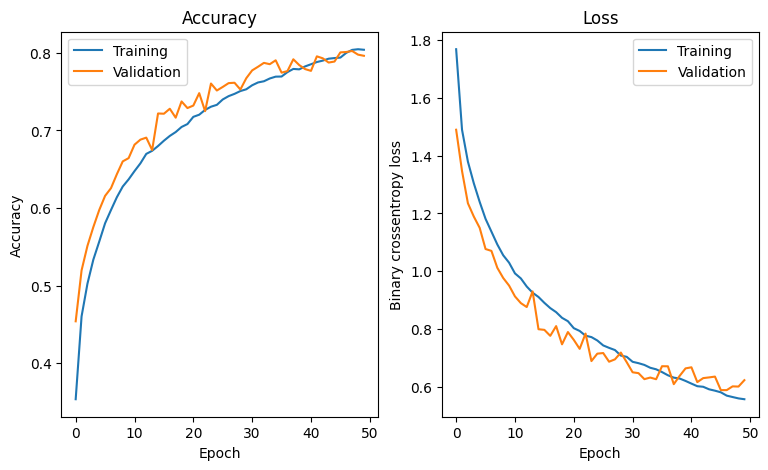

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8686 - loss: 0.3828
Training loss: 0.3846859335899353
Training accuracy: 0.8676249980926514
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8050 - loss: 0.5770
Validation loss: 0.5881702899932861


In [ ]:
#defining the model
model_b = Sequential()
model_b.add(Conv2D(32, (3, 3),padding = "same", input_shape = (32, 32, 3)))
model_b.add(Activation("relu"))
model_b.add(Conv2D(32, (3, 3), padding = "same",))
model_b.add(Activation("relu"))
model_b.add(MaxPooling2D(pool_size=(2, 2)))

model_b.add(Conv2D(64, (3, 3), padding = "same"))
model_b.add(Activation("relu"))
model_b.add(Conv2D(64, (3, 3), padding = "same",))
model_b.add(Activation("relu"))
model_b.add(MaxPooling2D(pool_size=(2, 2)))

model_b.add(Flatten())
model_b.add(Dense(512, activation='relu'))
model_b.add(Dropout(0.5))
model_b.add(Dense(units = 10, activation='softmax'))
# model_b.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model_b.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

#creating a data generator for real time data augmentation
datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)

#compute quantities required for featurewise normalization
datagen.fit(x_train)

#checkpoint
save_path = '/content/drive/My Drive/model_b.h5'
callbacks_save = ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True, save_freq = 'epoch')

#change to 50 epochs, batch size 32 when finished testing
history = model_b.fit(datagen.flow(x_train, y_train_c, batch_size =32),
                      steps_per_epoch = len(x_train)//16,
                     epochs = 50, verbose = 1,
                     validation_data = (x_val, y_val_c),
                     callbacks = [callbacks_save])

plt.figure(figsize = [9, 5])
acc_curve_train = np.array(history.history['accuracy'])
acc_curve_val = np.array(history.history['val_accuracy'])
loss_curve_train = np.array(history.history['loss'])
loss_curve_val = np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)

#load best model saved based on lowest validation loss
model_b = load_model(save_path)

#evaluate model on training samples
score = model_b.evaluate(x_train, y_train_c)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

#evaluate model on validation set
score = model_b.evaluate(x_val, y_val_c)
print('Validation loss:', score[0])

g. What do you observe from the validation loss in both step e and f? Is the model overfitting or underfitting?

The validation loss is significantly less in step f however they are both overfitting. The overfitting in model b is significantly less than the overfitting in model a

Epoch 1/50
621/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3984 - loss: 1.8114

625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3992 - loss: 1.8085 - val_accuracy: 0.5675 - val_loss: 1.2426
Epoch 2/50
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6602 - loss: 0.9618

625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.6603 - loss: 0.9615 - val_accuracy: 0.6048 - val_loss: 1.1545
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7260 - loss: 0.7877 - val_accuracy: 0.5857 - val_loss: 1.1878
Epoch 4/50
620/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7654 - loss: 0.6684

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7653 - loss: 0.6686 - val_accuracy: 0.6792 - val_loss: 1.0114
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8006 - loss: 0.5718 - val_accuracy: 0.6651 - val_loss: 1.0369
Epoch 6/50
622/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8275 - loss: 0.4998

625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8274 - loss: 0.4999 - val_accuracy: 0.6875 - val_loss: 0.9960
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8508 - loss: 0.4311 - val_accuracy: 0.6737 - val_loss: 1.0558
Epoch 8/50
618/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8650 - loss: 0.3835

625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8649 - loss: 0.3838 - val_accuracy: 0.7386 - val_loss: 0.9824
Epoch 9/50
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8851 - loss: 0.3291

625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8850 - loss: 0.3292 - val_accuracy: 0.7189 - val_loss: 0.9247
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8980 - loss: 0.2934

625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8979 - loss: 0.2934 - val_accuracy: 0.7709 - val_loss: 0.7781
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9047 - loss: 0.2718 - val_accuracy: 0.7473 - val_loss: 0.9305
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9145 - loss: 0.2454 - val_accuracy: 0.7582 - val_loss: 0.8449
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9210 - loss: 0.2327 - val_accuracy: 0.7571 - val_loss: 0.9166
Epoch 14/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9301 - loss: 0.2081 - val_accuracy: 0.6540 - val_loss: 1.6625
Epoch 15/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9314 - loss: 0.1981 - val_accuracy: 0.7482 - val_loss: 1.0899
Epoch 16/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9338 - loss: 0.1922 - val_accuracy: 0.7645 - val_loss: 0.9840
Epoch 17/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9427 - loss: 0.1670 - val_accuracy: 0.7

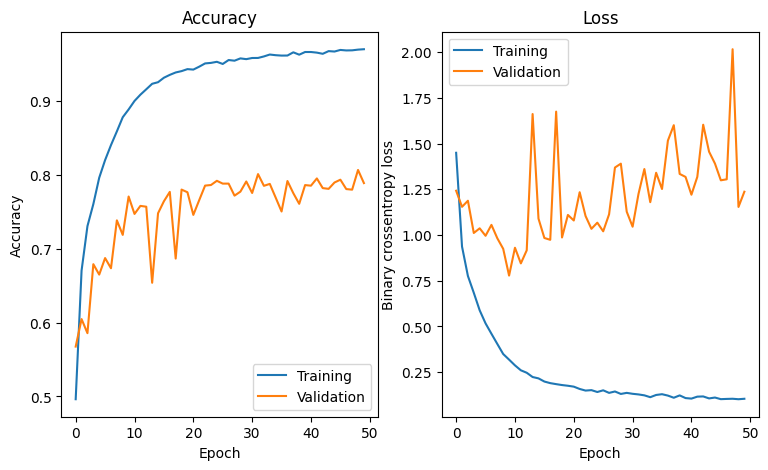

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9365 - loss: 0.1880
Training loss: 0.19352132081985474
Training accuracy: 0.9361249804496765
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7693 - loss: 0.7846
Validation loss: 0.7781200408935547


In [ ]:
#defining the model
model_c = Sequential()
model_c.add(Conv2D(32, (3, 3),padding = "same", input_shape = (32, 32, 3), use_bias= False))
model_c.add(BatchNormalization())
model_c.add(Activation("relu"))
model_c.add(Conv2D(32, (3, 3), padding = "same", use_bias= False))
model_c.add(BatchNormalization())
model_c.add(Activation("relu"))
model_c.add(MaxPooling2D(pool_size=(2, 2)))

model_c.add(Conv2D(64, (3, 3), padding = "same", use_bias= False))
model_c.add(BatchNormalization())
model_c.add(Activation("relu"))
model_c.add(Conv2D(64, (3, 3), padding = "same", use_bias= False))
model_c.add(BatchNormalization())
model_c.add(Activation("relu"))
model_c.add(MaxPooling2D(pool_size=(2, 2)))

model_c.add(Flatten())
model_c.add(Dense(512, ))
model_c.add(BatchNormalization())
model_c.add(Activation("relu"))
model_c.add(Dropout(0.5))
#not batch normalizing the output layer
model_c.add(Dense(units = 10, activation='softmax'))
# model_c.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model_c.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

#checkpoint
save_path = '/content/drive/My Drive/model_c.h5'
callbacks_save = ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True, save_freq = 'epoch')

#change to 50 epochs, batch size 32 when finished testing
history = model_c.fit(x_train, y_train_c, batch_size =64,
                     epochs = 50, verbose = 1,
                     validation_data = (x_val, y_val_c),
                     callbacks = [callbacks_save])

plt.figure(figsize = [9, 5])
acc_curve_train = np.array(history.history['accuracy'])
acc_curve_val = np.array(history.history['val_accuracy'])
loss_curve_train = np.array(history.history['loss'])
loss_curve_val = np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)

#load best model saved based on lowest validation loss
model_c = load_model(save_path)

#evaluate model on training samples
score = model_c.evaluate(x_train, y_train_c)
print('Training loss:', score[0])
print('Training accuracy:', score[1])

#evaluate model on validation set
score = model_c.evaluate(x_val, y_val_c)
print('Validation loss:', score[0])

I. What do you observe from the training loss in both steps e and h? explain.

In both e and h the training loss is very small whereas the validation loss is not as consistent and goes all over the place. This means the model is overfitting and becoming very good at detecting the  training data but not as good on the validation set.